# Overview

The following example demonstrates a data science workflow from start to finish using real world hotel booking demand data. The data files are named H1.csv and H2.csv and can be obtained from https://support.sas.com/documentation/onlinedoc/viya/examples.htm. The data are originally from https://www.sciencedirect.com/science/article/pii/S2352340918315191.

# Load the SWAT Library and Connect to the CAS Server

Load the SWAT library and then create a connection to the CAS server using the CAS function and assign the CAS connection object to the variable s. The first argument specifies the host name, and the second argument specifies the port.

In [482]:
import swat
# change the host and port to match your site
s = swat.CAS("rdcgrd310.unx.sas.com", 10065)

# Load the Data

## Load the Data from a Caslib

There are two data files, H1 and H2, that first need to be imported and then combined (appended) together. The default method of loading data is to load the data from the data source portion of a caslib, which is known as a server-side load. This requires the data files to be saved in the active caslib (Casuser). Once the files have been saved to the caslib, use a table.loadTable action for each CSV file to load the data files into memory.

In the importOptions parameter, specify CSV for the fileType.
For encoding, specify latin1.
For guessRows, specify a number that includes all rows in the data set, such as 100,000 so that all rows will be scanned to determine the appropriate data type for each column.

In [483]:
s.table.loadTable(path="H1.csv",
                  caslib="casuser",
                  casOut={"name":"H1",
                          "caslib":"casuser",
                          "replace":True},
                  importOptions={"fileType":"csv",
                                 "encoding":"latin1",
                                 "guessRows":"100000"})

s.table.loadTable(path="H2.csv",
                  caslib="casuser",
                  casOut={"name":"H2",
                          "caslib":"casuser",
                          "replace":True},
                  importOptions={"fileType":"csv",
                                 "encoding":"latin1",
                                 "guessRows":"100000"})

NOTE: Cloud Analytic Services made the file H1.csv available as table H1 in caslib CASUSER(gazhan).
NOTE: Cloud Analytic Services made the file H2.csv available as table H2 in caslib CASUSER(gazhan).


[caslib]

 'CASUSER(gazhan)'

[tableName]

 'H2'

[casTable]

 CASTable('H2', caslib='CASUSER(gazhan)')

+ Elapsed: 0.234s, user: 0.618s, sys: 0.137s, mem: 271mb

# Explore the Data

In [484]:
tbl1 = s.CASTable(name='H1', caslib='casuser')
tbl2 = s.CASTable(name='H2', caslib='casuser')

## Count the Number of Rows

Count the number of rows in each table. Use the table.recordCount action to verify that the H1 and H2 data files were imported with the correct number of rows. H1 should have 40,060 rows and H2 should have 79,330 rows.

In [485]:
tbl1.recordCount()
tbl2.recordCount()

,N
0,79330


## Examine the Columns

Examine the columns in each table using the table.columnInfo action to make sure the columns have the correct type. The result includes the names of columns, and information about each column, including its label (if applicable), type, length, and format.

In [486]:
tbl1.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,IsCanceled,,1,double,8,12,,0,0
1,LeadTime,,2,double,8,12,,0,0
2,ArrivalDateYear,,3,double,8,12,,0,0
3,ArrivalDateMonth,,4,varchar,9,9,,0,0
4,ArrivalDateWeekNumber,,5,double,8,12,,0,0
5,ArrivalDateDayOfMonth,,6,double,8,12,,0,0
6,StaysInWeekendNights,,7,double,8,12,,0,0
7,StaysInWeekNights,,8,double,8,12,,0,0
8,Adults,,9,double,8,12,,0,0
9,Children,,10,double,8,12,,0,0


In [487]:
tbl2.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,IsCanceled,,1,double,8,12,,0,0
1,LeadTime,,2,double,8,12,,0,0
2,ArrivalDateYear,,3,double,8,12,,0,0
3,ArrivalDateMonth,,4,varchar,9,9,,0,0
4,ArrivalDateWeekNumber,,5,double,8,12,,0,0
5,ArrivalDateDayOfMonth,,6,double,8,12,,0,0
6,StaysInWeekendNights,,7,double,8,12,,0,0
7,StaysInWeekNights,,8,double,8,12,,0,0
8,Adults,,9,double,8,12,,0,0
9,Children,,10,varchar,2,2,,0,0


## Specify Column Type When Loading Data

By default, the "children" column is imported as a double type in table H1 but it is imported as a varchar type in table H2 (due to missing values). The columns in each table need to be the same type for the tables to be appended. Therefore, it is necessary to add a vars subparameter in the loadTable action for H2 to import the children column as a double type. Use the columnInfo action to view the table H2.

In [488]:
s.table.loadTable(path="H2.csv",
                  caslib="casuser",
                  casOut={"name":"H2",
                          "caslib":"casuser",
                          "replace":True},
                  importOptions={"fileType":"csv",
                                 "encoding":"latin1",
                                 "guessRows":"10000",
                                 "vars":{"children":{"type":"double"}}})

tbl2.columnInfo()

NOTE: Cloud Analytic Services made the file H2.csv available as table H2 in caslib CASUSER(gazhan).


,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,IsCanceled,,1,double,8,12,,0,0
1,LeadTime,,2,double,8,12,,0,0
2,ArrivalDateYear,,3,double,8,12,,0,0
3,ArrivalDateMonth,,4,varchar,9,9,,0,0
4,ArrivalDateWeekNumber,,5,double,8,12,,0,0
5,ArrivalDateDayOfMonth,,6,double,8,12,,0,0
6,StaysInWeekendNights,,7,double,8,12,,0,0
7,StaysInWeekNights,,8,double,8,12,,0,0
8,Adults,,9,double,8,12,,0,0
9,Children,,10,double,8,12,,0,0


The column information for table H2 now correctly specifies that the Children column has a double type.

# Prepare the Data

## Create a New Column to Identify Hotel Type

Table H1 contains booking information about a resort hotel and table H2 contains booking information about a city hotel. Prior to appending the tables, use the table.copyTable action with the computedVars and computedVarsProgram subparameters to create a new column in each table named "hotel" to identify whether the bookings come from the resort hotel or city hotel. Set the values of hotel to "R" in table H1 to represent the resort hotel and "C" in table H2 to represent the city hotel.

In [489]:
tbl1.computedVars = {"name":"hotel"}
tbl1.computedVarsProgram = "hotel='R'"
tbl1.copyTable(casOut={"caslib":"casuser", 
                       "name":"H1_new", 
                       "replace":True})
tbl1_new = s.CASTable("H1_new", caslib="casuser")

In [490]:
tbl2.computedVars = {"name":"hotel"}
tbl2.computedVarsProgram = "hotel='C'"
tbl2.copyTable(casOut={"caslib":"casuser", 
                       "name":"H2_new", 
                       "replace":True})
tbl2_new = s.CASTable("H2_new", caslib="casuser")

## Append the Tables

The next step is to append tables H1 and H2. Use table.append to combine rows from the source table H1 to the target table H2. Use table.alterTable to rename the appended table H2_new to hotel_bookings.

The target parameter specifies H2_new as the table that will have the source table appended to it.
The source parameter specifies H1_new as the table that will be appended to the target table.

In [491]:
s.table.append(target={"caslib":"casuser", 
                       "name":"H2_new"},
               source={"caslib":"casuser", 
                       "name":"H1_new"})

tbl2_new.alterTable(rename="hotel_bookings")

NOTE: Successfully appended 40060 rows from H1_NEW to H2_NEW.


+ Elapsed: 0.000239s, user: 0.000179s, sys: 2.8e-05s, mem: 0.285mb

In [492]:
tbl_hotel = s.CASTable("hotel_bookings", caslib="casuser")

## Examine Column Information and Count Distinct and Missing Values

Check column data types and check for null values. Use columnInfo to check each column's data type. Use simple.distinct to identify the number of distinct values for each column.

In [493]:
tbl_hotel.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,IsCanceled,,1,double,8,12,,0,0
1,LeadTime,,2,double,8,12,,0,0
2,ArrivalDateYear,,3,double,8,12,,0,0
3,ArrivalDateMonth,,4,varchar,9,9,,0,0
4,ArrivalDateWeekNumber,,5,double,8,12,,0,0
5,ArrivalDateDayOfMonth,,6,double,8,12,,0,0
6,StaysInWeekendNights,,7,double,8,12,,0,0
7,StaysInWeekNights,,8,double,8,12,,0,0
8,Adults,,9,double,8,12,,0,0
9,Children,,10,double,8,12,,0,0


In [494]:
tbl_hotel.distinct()

,Column,NDistinct,NMiss,Trunc
0,IsCanceled,2.0,0.0,0.0
1,LeadTime,479.0,0.0,0.0
2,ArrivalDateYear,3.0,0.0,0.0
3,ArrivalDateMonth,12.0,0.0,0.0
4,ArrivalDateWeekNumber,53.0,0.0,0.0
5,ArrivalDateDayOfMonth,31.0,0.0,0.0
6,StaysInWeekendNights,17.0,0.0,0.0
7,StaysInWeekNights,35.0,0.0,0.0
8,Adults,14.0,0.0,0.0
9,Children,6.0,4.0,0.0


The simple.distinct action shows that there are 4 missing values in the Children column.

## Replace Missing Values with Zeros

Use the table.update action to replace missing values in the Children column with zero. Use a simple.distinct action to ensure that there are no missing values.

In [495]:
tbl_hotel.where = "Children is null"
tbl_hotel.update(set=[{"var":"Children", 
                       "value":"0"}])

[tableName]

 'HOTEL_BOOKINGS'

[rowsUpdated]

 4

+ Elapsed: 0.0117s, user: 0.0593s, sys: 0.0162s, mem: 5.63mb

In [496]:
del tbl_hotel.where
tbl_hotel.vars = [{"name":"children"}]
tbl_hotel.distinct()

,Column,NDistinct,NMiss,Trunc
0,Children,5.0,0.0,0.0


## Subset the Data to Exclude Invalid Rows

Use a table.copyTable action with an expression in the where parameter to subset the rows to keep only the rows where children, adults, or babies are greater than zero. This removes rows where the values of the adults, babies, and children columns are zero, since all three columns cannot be zero. Then use table.recordCount to count the number of rows to see how many cases are now in the subsetted data.

In [497]:
del tbl_hotel.vars
tbl_hotel.where = "children > 0 | adults > 0 | babies > 0"
tbl_hotel.copyTable(casOut={"name":"hotel_bookings_subset", 
                            "replace":True})
tbl_subset = s.CASTable(name="hotel_bookings_subset", caslib="casuser")
tbl_subset.recordCount()

,N
0,119210


# Analyze the Data

## Create a Frequency Table

Load the freqTab action set and use the freqTab.freqTab action to create a frequency distribution for country and include only bookings that have not been canceled.

In the order parameter, specify FREQ to sort rows by descending frequency count.
In the vars subparameter, specify country as the column that the frequencies will be calculated on.
Use the where subparameter to subset the data so that frequencies are calculated only on bookings that are not canceled.

In [498]:
del tbl_hotel.where
s.loadActionSet("freqTab")
tbl_subset.vars = [{"name":"country"}]
tbl_subset.where = "iscanceled = 0"
tbl_subset.freqTab(order="FREQ")

NOTE: Added action set 'freqTab'.


[NObs]

 Number of Observations
 
       RowId                  Description    Value
 0     NREAD  Number of Observations Read  75011.0
 1     NUSED  Number of Observations Used  75011.0
 2  NWEIGHTS               Sum of Weights  75011.0

[LevelInfo]

 Variable Level Information
 
   Variable  Levels                                             Values
 0  Country     166  PRT GBR FRA ESP DEU IRL ITA BEL NLD USA BRA CH...

[Table1.OneWayFreqs]

 Country
 
     F_Country Country  Frequency    Percent  CumFrequency  CumPercent
 0         PRT     PRT    20977.0  27.965232       20977.0   27.965232
 1         GBR     GBR     9668.0  12.888776       30645.0   40.854008
 2         FRA     FRA     8468.0  11.289011       39113.0   52.143019
 3         ESP     ESP     6383.0   8.509419       45496.0   60.652438
 4         DEU     DEU     6067.0   8.088147       51563.0   68.740585
 5         IRL     IRL     2542.0   3.388836       54105.0   72.129421
 6         ITA     ITA     2428.0   3.236859       56533.0   75.366280
 7         BEL     BEL     1868.0   2.490301       58401.0   77.856581
 8         NLD     NLD     1716.0   2.287664       60117.0   80.144246
 9         USA     USA     1592.0   2.122355       61709.0   82.266601
 10        BRA     BRA     1392.0   1.855728       63101.0   84.122329
 11        CHE     CHE     1298.0   1.730413       64399.0   85.852742
 12        AUT     AUT     1033.0   1.377131       65432.0   87.229873
 13         CN      CN     1025.0   1.366466       66457.0   88.596339
 14        SWE     SWE      793.0   1.057178       67250.0   89.653517
 15        POL     POL      703.0   0.937196       67953.0   90.590713
 16        CHN     CHN      537.0   0.715895       68490.0   91.306608
 17        ISR     ISR      500.0   0.666569       68990.0   91.973177
 18        NOR     NOR      426.0   0.567917       69416.0   92.541094
 19       NULL    NULL      421.0   0.561251       69837.0   93.102345
 20        RUS     RUS      391.0   0.521257       70228.0   93.623602
 21        FIN     FIN      377.0   0.502593       70605.0   94.126195
 22        ROU     ROU      366.0   0.487928       70971.0   94.614123
 23        DNK     DNK      326.0   0.434603       71297.0   95.048726
 24        AUS     AUS      319.0   0.425271       71616.0   95.473997
 25        LUX     LUX      177.0   0.235965       71793.0   95.709963
 26        JPN     JPN      169.0   0.225300       71962.0   95.935263
 27        ARG     ARG      160.0   0.213302       72122.0   96.148565
 28        AGO     AGO      157.0   0.209303       72279.0   96.357868
 29        HUN     HUN      153.0   0.203970       72432.0   96.561838
 30        MAR     MAR      150.0   0.199971       72582.0   96.761808
 31        TUR     TUR      146.0   0.194638       72728.0   96.956446
 32        CZE     CZE      134.0   0.178640       72862.0   97.135087
 33        IND     IND      116.0   0.154644       72978.0   97.289731
 34        SRB     SRB       98.0   0.130648       73076.0   97.420378
 35        GRC     GRC       93.0   0.123982       73169.0   97.544360
 36        DZA     DZA       82.0   0.109317       73251.0   97.653677
 37        KOR     KOR       78.0   0.103985       73329.0   97.757662
 38        HRV     HRV       75.0   0.099985       73404.0   97.857648
 39        MEX     MEX       75.0   0.099985       73479.0   97.957633
 40        LTU     LTU       74.0   0.098652       73553.0   98.056285
 41        NZL     NZL       68.0   0.090653       73621.0   98.146938
 42        EST     EST       65.0   0.086654       73686.0   98.233592
 43        BGR     BGR       63.0   0.083988       73749.0   98.317580
 44        IRN     IRN       59.0   0.078655       73808.0   98.396235
 45        ISL     ISL       53.0   0.070656       73861.0   98.466892
 46        CHL     CHL       49.0   0.065324       73910.0   98.532215
 47        ZAF     ZAF       49.0   0.065324       73959.0   98.597539
 48        COL     COL       48.0   0.063991       74007.0   98

## Calculate Summary Statistics by Month and Hotel Type

Examine how the price varies per night over the year. Use simple.summary to calculate the average (mean) daily rate of bookings by month for each hotel type (Resort and City), excluding canceled bookings, and save the results to separate tables based on each hotel type, named "bookings_summary_resort" and "bookings_summary_city". For each simple.summary action:

In the table parameter, specify arrivaldatemonth as the column for the groupBy subparameter so that statistics are calculated for each month in the resulting output table.

In the where subparameter, specify an expression that selects only bookings that are not canceled and the type of hotel.
In the inputs parameter, specify adr so that statistics are calculated on this column.

In the subset parameter, specify MEAN to calculate the mean of the column specified in the inputs parameter, adr.

Use a table.fetch action to fetch the arrivaldatemonth and _Mean_ columns from the output tables. The months are returned in alphabetical order, and will need to be sorted in the correct order.

In [499]:
del tbl_subset.vars 
del tbl_subset.where

tbl_subset.groupBy = [{"name":"arrivaldatemonth"}]
tbl_subset.where = "iscanceled = 0 & hotel='R'"
tbl_subset.summary(inputs={"adr"},
                   subset={"MEAN"},
                   casout={"name":"bookings_summary_resort", 
                           "replace":True})
tbl_resort = s.CASTable("bookings_summary_resort", caslib="casuser")

tbl_subset.groupBy = [{"name":"arrivaldatemonth"}]
tbl_subset.where = "iscanceled = 0 & hotel='C'"
tbl_subset.summary(inputs={"adr"},
                   subset={"MEAN"},
                   casout={"name":"bookings_summary_city", 
                           "replace":True})
tbl_city = s.CASTable("bookings_summary_city", caslib="casuser")

In [500]:
tbl_resort.fetch(fetchVars={"arrivaldatemonth", 
                            "_Mean_"})

,_Mean_,ArrivalDateMonth
0,75.867816,April
1,181.205892,August
2,68.410104,December
3,54.147478,February
4,48.761125,January
5,150.122528,July
6,107.974850,June
7,57.056838,March
8,76.657558,May
9,48.706289,November


In [501]:
tbl_city.fetch(fetchVars={"arrivaldatemonth", 
                          "_Mean_"})

,_Mean_,ArrivalDateMonth
0,111.962267,April
1,118.674598,August
2,88.401855,December
3,86.520062,February
4,82.330983,January
5,115.818019,July
6,117.874360,June
7,90.658533,March
8,120.669827,May
9,86.946592,November


In [502]:
tbl_subset

CASTable('hotel_bookings_subset', caslib='casuser', groupby=[dict(name='arrivaldatemonth')], where="iscanceled = 0 & hotel='C'")

## Sort Results by Month

To display the tables with the month column sorted in order, first use the table.copyTable action with the computedVars and computedVarsProgram parameters to create a numeric column named "monthno" containing the month number for each month based on the value of arrivaldatemonth. The result is saved to a table named "hotel_bookings_subset_monthno". For the simple.summary actions, include monthno in the groupBy parameter so that the fetched tables can be sorted by month number.

In [503]:
del tbl_subset.groupBy
del tbl_subset.where
tbl_subset.computedVars = [{"name":"monthno"}]
tbl_subset.computedVarsProgram = """if arrivaldatemonth='January' then monthno=1;
                                    else if arrivaldatemonth='February' then monthno=2;
                                    else if arrivaldatemonth='March' then monthno=3;
                                    else if arrivaldatemonth='April' then monthno=4;
                                    else if arrivaldatemonth='May' then monthno=5;
                                    else if arrivaldatemonth='June' then monthno=6;
                                    else if arrivaldatemonth='July' then monthno=7;
                                    else if arrivaldatemonth='August' then monthno=8;
                                    else if arrivaldatemonth='September' then monthno=9;
                                    else if arrivaldatemonth='October' then monthno=10;
                                    else if arrivaldatemonth='November' then monthno=11;
                                    else if arrivaldatemonth='December' then monthno=12"""

tbl_subset.copyTable(casout={"caslib":"casuser", 
                             "name":"hotel_bookings_subset_monthno", 
                             "replace":True})

tbl_subset_monthno = s.CASTable(name="hotel_bookings_subset_monthno", caslib="casuser")

In [504]:
tbl_subset_monthno.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel,monthno
0,0.0,6.0,2015.0,July,27.0,1.0,0.0,2.0,1.0,0.0,NULL,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-03,C,7.0
1,1.0,88.0,2015.0,July,27.0,1.0,0.0,4.0,2.0,0.0,NULL,0.0,Transient,76.5,0.0,1.0,Canceled,2015-07-01,C,7.0
2,1.0,65.0,2015.0,July,27.0,1.0,0.0,4.0,1.0,0.0,NULL,0.0,Transient,68.0,0.0,1.0,Canceled,2015-04-30,C,7.0
3,1.0,92.0,2015.0,July,27.0,1.0,2.0,4.0,2.0,0.0,NULL,0.0,Transient,76.5,0.0,2.0,Canceled,2015-06-23,C,7.0
4,1.0,100.0,2015.0,July,27.0,2.0,0.0,2.0,2.0,0.0,NULL,0.0,Transient,76.5,0.0,1.0,Canceled,2015-04-02,C,7.0


In [505]:
tbl_subset_monthno.groupBy = [{"name":"arrivaldatemonth"}, 
                              {"name":"monthno"}, 
                              {"name":"hotel"}]
tbl_subset_monthno.where = "iscanceled = 0 & hotel='R'"
tbl_subset_monthno.summary(inputs={"adr"},
                           subset={"MEAN"},
                           casout={"name":"bookings_summary_resort_monthno", 
                                   "replace":True})
tbl_subset_resort_monthno = s.CASTable("bookings_summary_resort_monthno", caslib="casuser")

In [506]:
tbl_subset_resort_monthno.head()

,ArrivalDateMonth,ArrivalDateMonth_f,monthno,monthno_f,hotel,hotel_f,_Column_,_Mean_
0,April,April,4.0,4,R,R,ADR,75.867816
1,August,August,8.0,8,R,R,ADR,181.205892
2,December,December,12.0,12,R,R,ADR,68.410104
3,February,February,2.0,2,R,R,ADR,54.147478
4,January,January,1.0,1,R,R,ADR,48.761125


In [507]:
tbl_subset_monthno.where = "iscanceled = 0 & hotel='C'"
tbl_subset_monthno.summary(inputs={"adr"},
                           subset={"MEAN"},
                           casout={"name":"bookings_summary_city_monthno", 
                                   "replace":True})
tbl_subset_city_monthno = s.CASTable("bookings_summary_city_monthno", caslib="casuser")

In [508]:
tbl_subset_monthno

CASTable('hotel_bookings_subset_monthno', caslib='casuser', groupby=[dict(name='arrivaldatemonth'), dict(name='monthno'), dict(name='hotel')], where="iscanceled = 0 & hotel='C'")

In [509]:
del tbl_subset_monthno.where
del tbl_subset_monthno.groupBy
tbl_subset_resort_monthno.alterTable(columns=[{"name":"_Mean_", "rename":"Mean Average Daily Rate"}])

+ Elapsed: 0.000355s, user: 0.00033s, mem: 0.306mb

In [510]:
tbl_subset_city_monthno.alterTable(columns=[{"name":"_Mean_", "rename":"Mean Average Daily Rate"}])

+ Elapsed: 0.00037s, user: 0.000348s, mem: 0.306mb

In [511]:
resort = tbl_subset_resort_monthno.fetch(fetchVars={"arrivaldatemonth", 
                                                    "Mean Average Daily Rate", 
                                                    "hotel"},
                                         sortBy=[{"name":"monthno"}])

In [512]:
city = tbl_subset_city_monthno.fetch(fetchVars={"arrivaldatemonth", 
                                                "Mean Average Daily Rate", 
                                                "hotel"},
                                     sortBy=[{"name":"monthno"}])

# Visualize the Data

## Create Line Charts to Visualize Results by Month

The pandas plot.line method can be used to visualize data that has been preprocessed using CAS actions. This method uses the matplotlib library through pandas rather than using matplotlib functions directly which creates cleaner plots. The method is used here to create line charts that show the mean average daily rate of bookings by month for each hotel type.

Text(0.5, 1.0, 'Mean Average Daily Rate by Month for Resort Hotel')

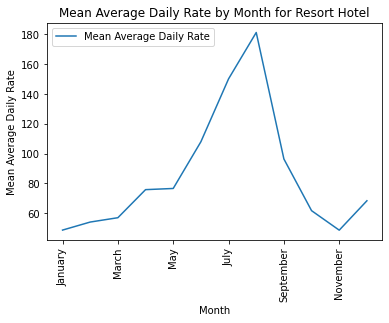

In [513]:
resort_df = resort["Fetch"]
resortMonthVBookings = resort_df.plot.line(x="ArrivalDateMonth", y="Mean Average Daily Rate", rot=90)
resortMonthVBookings.set_xlabel("Month")
resortMonthVBookings.set_ylabel("Mean Average Daily Rate")
resortMonthVBookings.set_title("Mean Average Daily Rate by Month for Resort Hotel")

Text(0.5, 1.0, 'Mean Average Daily Rate by Month for City Hotel')

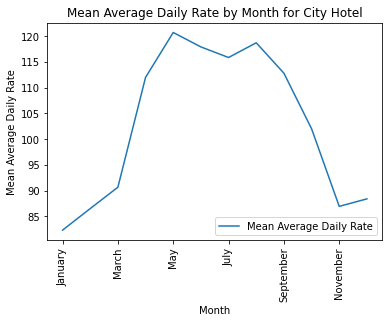

In [514]:
city_df = city["Fetch"]
cityMonthVBookings = city_df.plot.line(x="ArrivalDateMonth", y="Mean Average Daily Rate", rot=90)
cityMonthVBookings.set_xlabel("Month")
cityMonthVBookings.set_ylabel("Mean Average Daily Rate")
cityMonthVBookings.set_title("Mean Average Daily Rate by Month for City Hotel")

The sns.lineplot function from the Seaborn library can be used to create a grouped line chart with the month variable on the x-axis and the hotel type as the group variable. The Seaborn method does not require reshaping the data from long to wide. Before creating the line chart, first append the summary tables for resort and city hotels together, fetch the rows from the appended table, and then save it as an object named bookings_appended.

In [515]:
s.table.append(target={"caslib":"casuser",
                       "name":"bookings_summary_city_monthno"},
               source={"caslib":"casuser",
                       "name":"bookings_summary_resort_monthno"})            

NOTE: Successfully appended 12 rows from BOOKINGS_SUMMARY_RESORT_MONTHNO to BOOKINGS_SUMMARY_CITY_MONTHNO.


+ Elapsed: 0.00651s, user: 0.00176s, sys: 0.00834s, mem: 55.1mb

In [516]:
s.table.alterTable(name="bookings_summary_city_monthno",
                   rename="bookings_summary_appended",
                   caslib="casuser")

+ Elapsed: 0.000159s, user: 0.000101s, sys: 3e-05s, mem: 0.288mb

In [517]:
bookings_appended = s.table.fetch("bookings_summary_appended",
                                  to=25)

In [518]:
import matplotlib.pyplot as plt
import seaborn as sns

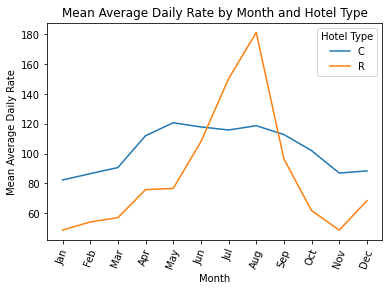

In [519]:
appended_df = bookings_appended["Fetch"]
g = sns.lineplot(data=appended_df, 
                 x='monthno', 
                 y='Mean Average Daily Rate', 
                 hue='hotel')
g.set(xlabel="Month",
      ylabel="Mean Average Daily Rate")
plt.xticks(rotation=70)
plt.title("Mean Average Daily Rate by Month and Hotel Type")
plt.legend(title='Hotel Type')
g.set_xticks([1, 2, 3, 
              4, 5, 6, 
              7, 8, 9, 
              10, 11, 12])
g.set_xticklabels(['Jan', 'Feb', "Mar", 
                   "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", 
                   "Oct", "Nov", "Dec"])
plt.show()